In [2]:
import pandas
import pickle
from Swimmer import *
from datetime import datetime
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import matplotlib.cm as cm
import pandas as pd

In [3]:
# Ripetiamo il codice dello stile scelto
Stile = "02"

In [34]:
# Individuiamo il nome della gara
S = {"00": "50 SL", "01": "100 SL", "02": "200 SL", "04": "400 SL", "08": "800 SL", "15": "1500 SL", "20": "50 DO", "21": "100 DO", "22": "200 DO", "30": "50 RA", "31": "100 RA", "32": "200 RA", "40": "50 FA", "41": "100 FA", "42": "200 FA", "50": "50 MI", "51": "100 MI", "54": "400 MI"}

In [4]:
# Apriamo il database
with open("nuotatori_"+Stile+"_db.pkl","rb") as pkl:
     swimmers = pickle.load( pkl)

In [8]:
# Imposto il ratio e facciamo vedere un esempio sul primo nuotatore
RATIO = 0.8
print(swimmers[0].times_date)

[('02:00.33', '06/07/2005'), ('02:01.05', '06/05/2007'), ('02:01.61', '02/02/2008'), ('02:02.36', '19/04/2008'), ('02:10.18', '23/05/2004'), ('02:11.28', '16/12/2012'), ('02:12.13', '11/03/2017')]


In [9]:
# Filtriamo i nuotatori per il ratio impostato
filtered_swimmers = list(filter(lambda x: x.ratio >= RATIO, swimmers))

In [10]:
# Stampiamo tutti i nuotatori che soddisfano la precedente funzione
for i in filtered_swimmers:
    print(str(i))
print (len(filtered_swimmers))

Name: D'ARPA GIROLAMO Class: 1967 Ratio: 0.8235294117647058
Name: BERRINI CLAUDIO Class: 1954 Ratio: 0.9411764705882353
Name: BRUGNOLI ALESSIO Class: 1964 Ratio: 0.8235294117647058
Name: MASSA MASSIMILIANO Class: 1967 Ratio: 1.0
Name: MORICI GIUSEPPE Class: 1956 Ratio: 0.8235294117647058
Name: BOTTI MARCO Class: 1960 Ratio: 0.8235294117647058
Name: OLIVA PIERO Class: 1943 Ratio: 0.9411764705882353
Name: CASELLI ANDREA Class: 1948 Ratio: 0.9411764705882353
Name: D'AGOSTINO LUCIANO Class: 1941 Ratio: 0.8235294117647058
9


In [11]:
# Lista dei nuotatori con i dati filtrati
for i in filtered_swimmers:
    print(str(i), i.times_date, i.locality)

Name: D'ARPA GIROLAMO Class: 1967 Ratio: 0.8235294117647058 [('02:09.72', '23/06/2008'), ('02:10.36', '27/06/2004'), ('02:10.54', '25/01/2009'), ('02:10.59', '23/06/2009'), ('02:10.70', '08/05/2004'), ('02:10.90', '15/02/2004'), ('02:11.03', '25/05/2008'), ('02:11.57', '07/06/2009'), ('02:11.89', '27/05/2007'), ('02:12.47', '19/12/2004'), ('02:12.50', '30/11/2002'), ('02:12.88', '02/02/2008'), ('02:13.07', '28/06/2006'), ('02:13.10', '09/07/2012'), ('02:13.20', '24/06/2003'), ('02:13.34', '21/06/2010'), ('02:13.47', '20/06/2011'), ('02:13.81', '02/02/2010'), ('02:14.21', '22/01/2012'), ('02:14.40', '21/04/2002'), ('02:14.62', '28/11/2010'), ('02:15.03', '01/03/2014'), ('02:15.13', '25/06/2002'), ('02:15.47', '24/06/2014'), ('02:15.69', '13/05/2012'), ('02:15.80', '02/07/2013'), ('02:20.42', '20/05/2017')] ['PALERMO', 'ROSSANO CALABRO', 'Catania', 'RICCIONE', 'Siracusa Città', 'Palermo', 'Palermo', 'Palermo', 'Palermo', 'Nesima', 'Napoli', 'Palermo', 'RICCIONE', 'BARI', 'CHIANCIANO TERM

In [12]:
 def str_to_date(d):
        """prende in input una data formattata "%d/%m/%Y"""
        return datetime.strptime(d[1], "%d/%m/%Y")

In [13]:
 def str_to_time(s):
        """prende in input un tempo formattato "%s.%us"""
        a=datetime.strptime(s[0], "%M:%S.%f")
        return a.minute*60 + a.second + (a.microsecond/ (10**6))
        

In [14]:
 def str_to_time2(s):
        """prende in input un tempo formattato "%s.%us"""
        return datetime.strptime(s[0], "%M:%S.%f")

In [15]:
for i in filtered_swimmers:
    i.converted_date_time=[]
    for j in i.times_date:
        i.converted_date_time.append(
        (str_to_date(j),
        str_to_time(j)))

In [16]:
for i in filtered_swimmers:
    print(str(i),
        #tuple((x.year,x.month,x.day,y)for x,y in i.converted_date_time)
        list(((j.date(),k) for j,k in i.converted_date_time)))

Name: D'ARPA GIROLAMO Class: 1967 Ratio: 0.8235294117647058 [(datetime.date(2008, 6, 23), 129.72), (datetime.date(2004, 6, 27), 130.36), (datetime.date(2009, 1, 25), 130.54), (datetime.date(2009, 6, 23), 130.59), (datetime.date(2004, 5, 8), 130.7), (datetime.date(2004, 2, 15), 130.9), (datetime.date(2008, 5, 25), 131.03), (datetime.date(2009, 6, 7), 131.57), (datetime.date(2007, 5, 27), 131.89), (datetime.date(2004, 12, 19), 132.47), (datetime.date(2002, 11, 30), 132.5), (datetime.date(2008, 2, 2), 132.88), (datetime.date(2006, 6, 28), 133.07), (datetime.date(2012, 7, 9), 133.1), (datetime.date(2003, 6, 24), 133.2), (datetime.date(2010, 6, 21), 133.34), (datetime.date(2011, 6, 20), 133.47), (datetime.date(2010, 2, 2), 133.81), (datetime.date(2012, 1, 22), 134.21), (datetime.date(2002, 4, 21), 134.4), (datetime.date(2010, 11, 28), 134.62), (datetime.date(2014, 3, 1), 135.03), (datetime.date(2002, 6, 25), 135.13), (datetime.date(2014, 6, 24), 135.47), (datetime.date(2012, 5, 13), 135.69)

Altrimenti cominciate a fare un po’ di statistica descrittiva.
In particolare:

1. Cosa succede se scelgo il 70% invece dell’80% ? Come cambia il dataset?
2. Per ogni gara, rappresentate (visualizzate) le prestazioni su un grafico con sulle ascisse la data e sulle ordinate il tempo di gara.
3. Calcolate medie, mediana, percentile, ecc.

In generale, quello che vogliamo fare è prevedere la performance di un atleta in funzione dell’età utilizzando questo dataset come training set.
Quindi iniziate a pensare quali variabili e quale modello utilizzare per fare questa previsione. Per esempio: le stagioni impattano sulla performance?

A presto,

FR

In [17]:
# Ora facciamo vedere cosa succede al dataset se prendiamo i nuotatori che hanno partecipato al 70% di gare
RATIO = 0.7

In [18]:
# Filtriamo i nuotatori per il ratio impostato
filtered_swimmers2 = list(filter(lambda x: x.ratio >= RATIO, swimmers))

In [19]:
# Stampiamo tutti i nuotatori che soddisfano la precedente funzione
for i in filtered_swimmers2:
    print(str(i))
print (len(filtered_swimmers2))

Name: GERBI PAOLO Class: 1963 Ratio: 0.7647058823529411
Name: CACCIAMANI MASSIMO Class: 1964 Ratio: 0.7058823529411765
Name: D'ARPA GIROLAMO Class: 1967 Ratio: 0.8235294117647058
Name: FERRI ATTILIO Class: 1964 Ratio: 0.7058823529411765
Name: BERRINI CLAUDIO Class: 1954 Ratio: 0.9411764705882353
Name: BRUGNOLI ALESSIO Class: 1964 Ratio: 0.8235294117647058
Name: D'ALESSANDRO VINCENZO Class: 1955 Ratio: 0.7647058823529411
Name: RIBECA STEFANO Class: 1960 Ratio: 0.7058823529411765
Name: FERRI PIERO Class: 1963 Ratio: 0.7058823529411765
Name: MASSA MASSIMILIANO Class: 1967 Ratio: 1.0
Name: FORQUET ERALDO Class: 1965 Ratio: 0.7647058823529411
Name: TAGLIAVIA PAUL JOLIN Class: 1957 Ratio: 0.7058823529411765
Name: PASCIUTO ANTONIO Class: 1959 Ratio: 0.7647058823529411
Name: MAZZONI GINO Class: 1956 Ratio: 0.7647058823529411
Name: MORICI GIUSEPPE Class: 1956 Ratio: 0.8235294117647058
Name: BOTTI MARCO Class: 1960 Ratio: 0.8235294117647058
Name: CASTELLI CLAUDIO Class: 1967 Ratio: 0.70588235294

In [20]:
# Listiamo i tempi di ogni nuotatore
def tempitotali(x):
    i.listtime=[]
    for j in i.times_date:
        i.listtime.append(
        str_to_time(j))
    return i.listtime

In [21]:
# Listiamo le date di ogni nuotatore
def datetotali(x):
    i.listdate=[]
    for j in i.times_date:
        i.listdate.append((str_to_date(j).date()))
    return i.listdate

In [22]:
# Forniamo la descrizione di ogni nuotatore
def descriptiveStat (x):
    print (str(x))
    print ('Dataset lenght:', len(tempitotali(x)))
    print ('Minimum value:', np.min(tempitotali(x)))
    print ('Maximum value:', np.max(tempitotali(x)))
    print ('Mean value:', np.mean(tempitotali(x)))
    print ('Median value:', np.median(tempitotali(x)))
    print ('First quartile', np.percentile((tempitotali(x)), 25))
    print ('Third quartile', np.percentile((tempitotali(x)), 75))

In [23]:
for i in filtered_swimmers:
    descriptiveStat(i)

Name: D'ARPA GIROLAMO Class: 1967 Ratio: 0.8235294117647058
Dataset lenght: 27
Minimum value: 129.72
Maximum value: 140.42
Mean value: 133.181851852
Median value: 133.1
First quartile 131.3
Third quartile 134.51
Name: BERRINI CLAUDIO Class: 1954 Ratio: 0.9411764705882353
Dataset lenght: 47
Minimum value: 134.12
Maximum value: 148.89
Mean value: 140.126808511
Median value: 139.2
First quartile 137.465
Third quartile 143.75
Name: BRUGNOLI ALESSIO Class: 1964 Ratio: 0.8235294117647058
Dataset lenght: 28
Minimum value: 134.82
Maximum value: 152.63
Mean value: 143.145714286
Median value: 142.935
First quartile 141.1175
Third quartile 145.84
Name: MASSA MASSIMILIANO Class: 1967 Ratio: 1.0
Dataset lenght: 41
Minimum value: 142.97
Maximum value: 163.52
Mean value: 147.905609756
Median value: 147.31
First quartile 145.57
Third quartile 149.59
Name: MORICI GIUSEPPE Class: 1956 Ratio: 0.8235294117647058
Dataset lenght: 28
Minimum value: 147.88
Maximum value: 172.97
Mean value: 159.494285714
Media

In [24]:
# Creiamo il DataFrame
nome=[]
tempi=[]
date=[]
for i in filtered_swimmers:
    for j in i.times_date:
        nome.append(i.name)
        tempi.append((str_to_time(j)))
        date.append(str(Swimmer.get_partecipation_year(str_to_date(j))))
        
Nuotatori = pd.DataFrame({'Nuotatore': nome,'Time': tempi, 'Date': date})
Nuotatori

,Date,Nuotatore,Time
0,2007-2008,D'ARPA GIROLAMO,129.72
1,2003-2004,D'ARPA GIROLAMO,130.36
2,2008-2009,D'ARPA GIROLAMO,130.54
3,2008-2009,D'ARPA GIROLAMO,130.59
4,2003-2004,D'ARPA GIROLAMO,130.70
5,2003-2004,D'ARPA GIROLAMO,130.90
6,2007-2008,D'ARPA GIROLAMO,131.03
7,2008-2009,D'ARPA GIROLAMO,131.57
8,2006-2007,D'ARPA GIROLAMO,131.89
9,2004-2005,D'ARPA GIROLAMO,132.47


In [25]:
# Aggiustiamo i dati, raggruppandoli
Nuotatori_plot = pd.DataFrame(Nuotatori.groupby([Nuotatori['Date'], Nuotatori['Nuotatore']]).Time.agg('mean'))

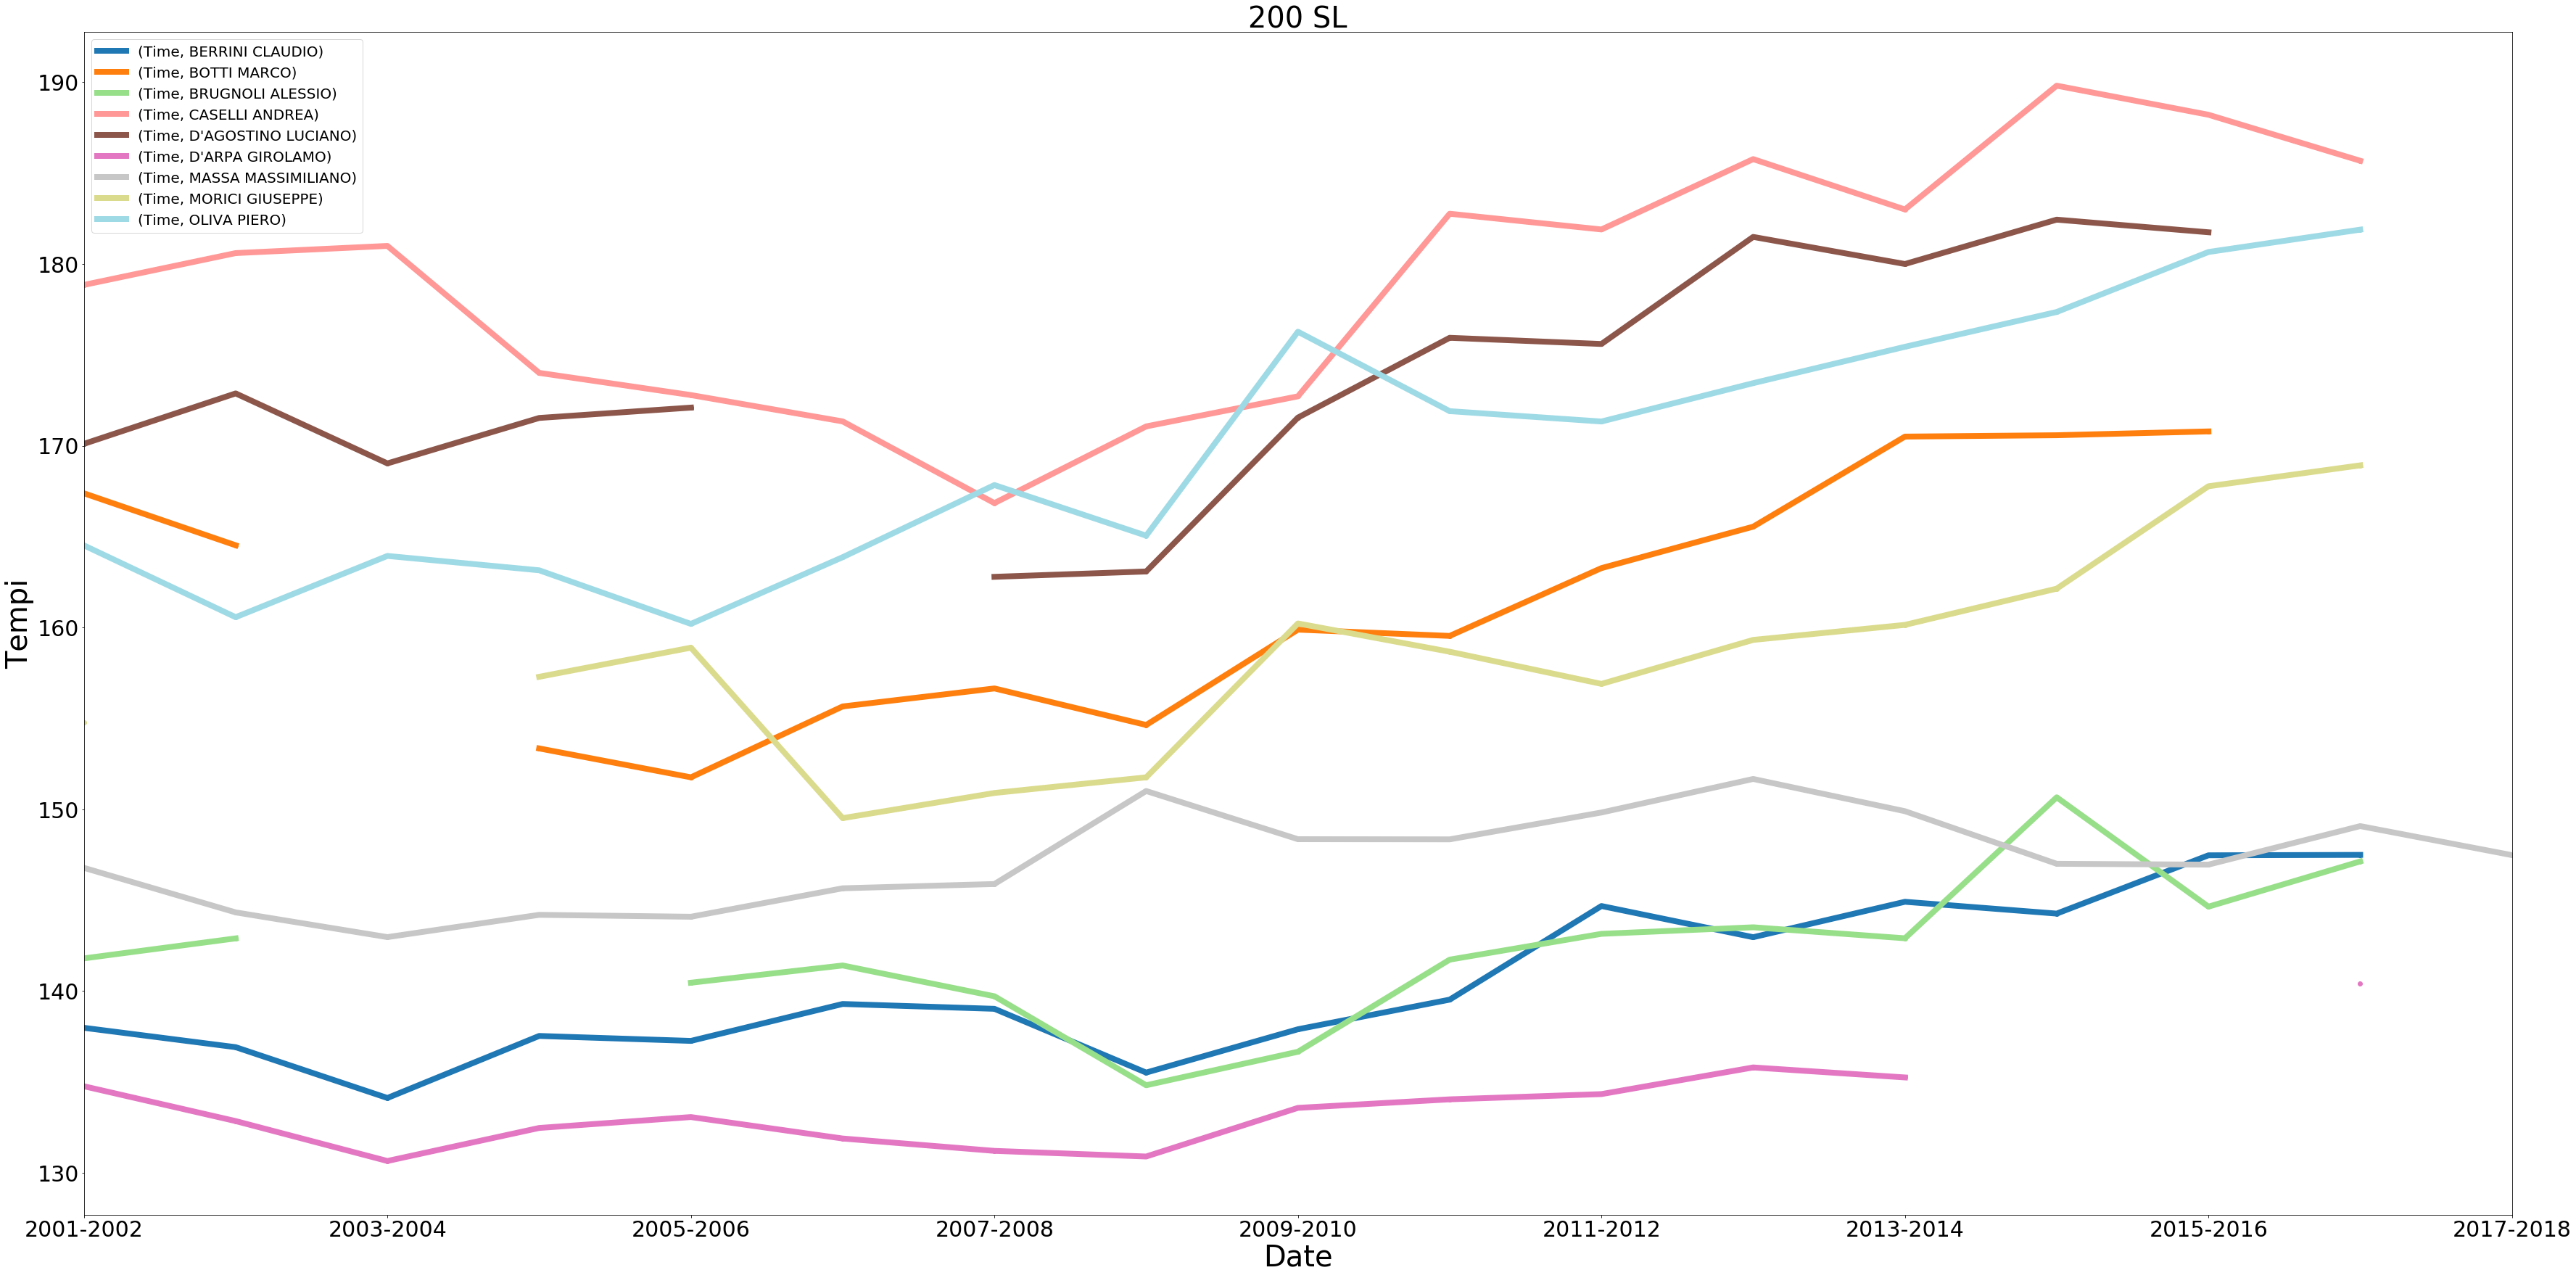

In [38]:
# Plottiamo il tutto in uno plot
colors=cm.tab20(np.linspace(0,1,len(filtered_swimmers)))
Nuotatori_plot.pivot_table(index='Date', columns='Nuotatore').plot(marker= 'o',linestyle='-',linewidth=8,figsize=(60, 30), fontsize=30, color=colors)
plt.xlabel('Date',fontsize=40)
plt.ylabel('Tempi',fontsize=40)
plt.title(S[Stile],fontsize=40)
plt.legend(fontsize=20)

In [27]:
# Funzione che ci permette di dividere i dati in base alle Stagioni
def select_season_of_year(d,s):
        """prende in input una data formattata in datetime e decide la stagionalita` dell'anno di partecipazione"""
        date = datetime.strptime(d[1], "%d/%m/%Y")
        if s=='inverno':
            if date.month >= 12 or date.month <= 2:
                return True
        if s=='primavera':
            if date.month >= 3 and date.month <= 5:
                return True
        if s=='estate':
            if date.month >= 6 and date.month <= 8:
                return True
        if s=='autunno':
            if date.month >= 9 and date.month <= 11:
                return True
        return False

In [28]:
# Dividiamo i dati dei nuotatori in base alle Stagioni dell'anno
nomep=[]
tempip=[]
datep=[]
nomee=[]
tempie=[]
datee=[]
nomea=[]
tempia=[]
datea=[]
nomei=[]
tempii=[]
datei=[]
for i in filtered_swimmers:
    for j in i.times_date:
        if select_season_of_year(j,'inverno'):
            nomei.append(i.name)
            datei.append(str(Swimmer.get_partecipation_year(str_to_date(j))))
            tempii.append((str_to_time(j)))
        if select_season_of_year(j,'primavera'):
            nomep.append(i.name)
            datep.append(str(Swimmer.get_partecipation_year(str_to_date(j))))
            tempip.append((str_to_time(j)))
        if select_season_of_year(j,'estate'):
            nomee.append(i.name)
            datee.append(str(Swimmer.get_partecipation_year(str_to_date(j))))
            tempie.append((str_to_time(j)))
        if select_season_of_year(j,'autunno'):
            nomea.append(i.name)
            datea.append(str(Swimmer.get_partecipation_year(str_to_date(j))))
            tempia.append((str_to_time(j)))
            
Nuotatori_primavera = pd.DataFrame({'Nuotatore': nomep,'Time': tempip, 'Date': datep})
Nuotatori_estate = pd.DataFrame({'Nuotatore': nomee,'Time': tempie, 'Date': datee})
Nuotatori_autunno = pd.DataFrame({'Nuotatore': nomea,'Time': tempia, 'Date': datea})
Nuotatori_inverno = pd.DataFrame({'Nuotatore': nomei,'Time': tempii, 'Date': datei})

In [29]:
# Aggiustiamo i dati, raggruppandoli
Nuotatori_primavera_plot = pd.DataFrame(Nuotatori_primavera.groupby([Nuotatori_primavera['Date'], Nuotatori_primavera['Nuotatore']]).Time.agg('mean'))
Nuotatori_estate_plot = pd.DataFrame(Nuotatori_estate.groupby([Nuotatori_estate['Date'], Nuotatori_estate['Nuotatore']]).Time.agg('mean'))
Nuotatori_autunno_plot = pd.DataFrame(Nuotatori_autunno.groupby([Nuotatori_autunno['Date'], Nuotatori_autunno['Nuotatore']]).Time.agg('mean'))
Nuotatori_inverno_plot = pd.DataFrame(Nuotatori_inverno.groupby([Nuotatori_inverno['Date'], Nuotatori_inverno['Nuotatore']]).Time.agg('mean'))                  

In [30]:
Nuotatori_primavera_pivot = Nuotatori_primavera_plot.pivot_table(index='Date', columns='Nuotatore')
Nuotatori_inverno_pivot = Nuotatori_inverno_plot.pivot_table(index='Date', columns='Nuotatore')
Nuotatori_autunno_pivot = Nuotatori_autunno_plot.pivot_table(index='Date', columns='Nuotatore')
Nuotatori_estate_pivot = Nuotatori_estate_plot.pivot_table(index='Date', columns='Nuotatore')

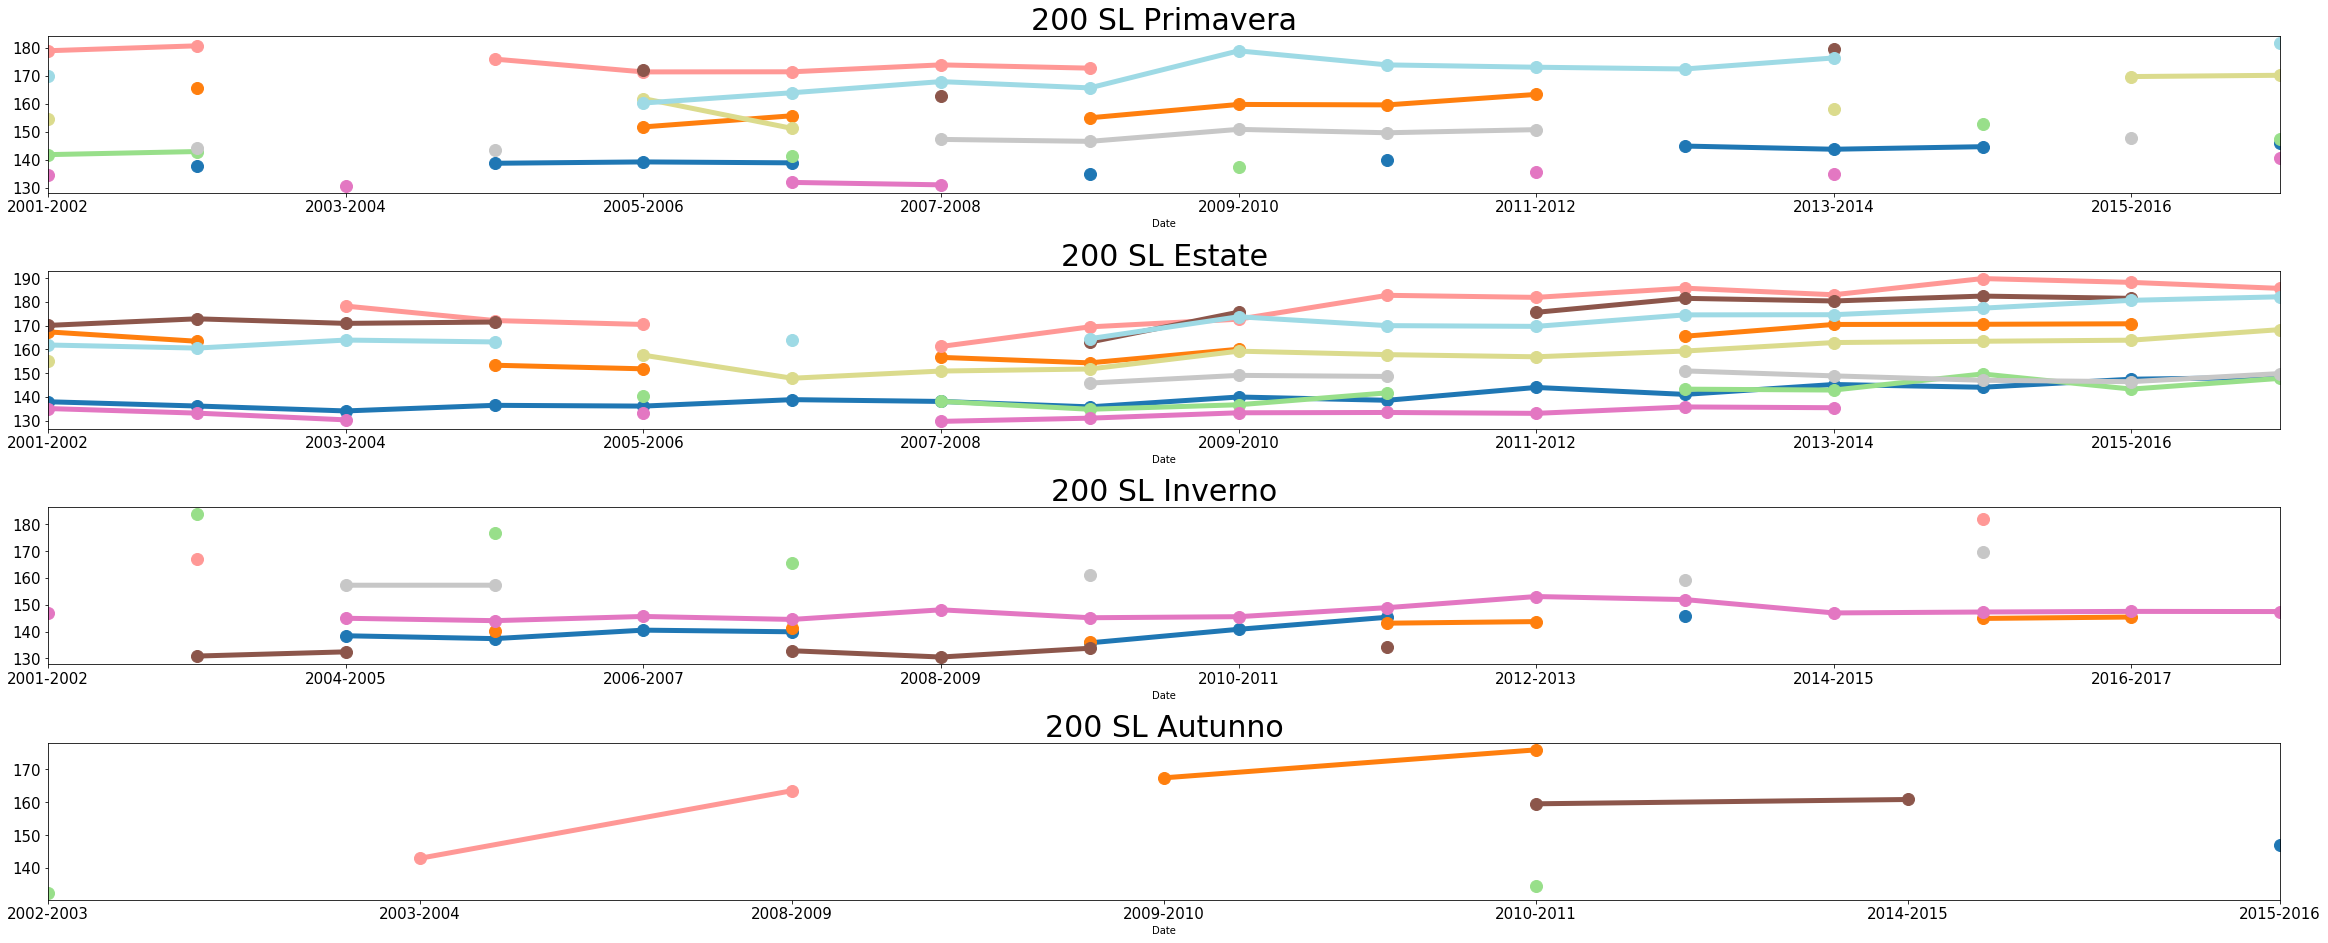

In [37]:
# Plottiamo i dati dei nuotatori in base alle Stagioni dell'anno
plt.subplot(4, 1, 1)
Nuotatori_primavera_pivot.plot(ax=plt.gca(),marker= 'o',markersize=12,linestyle='-',linewidth=5,figsize = (40,20), fontsize=15, color=colors, legend=False)
plt.title(S[Stile]+" Primavera",fontsize=30)

plt.subplot(4, 1, 2)
Nuotatori_estate_pivot.plot(ax=plt.gca(),marker= 'o', markersize=12,linestyle='-',linewidth=5,figsize = (40,20), fontsize=15, color=colors, legend=False)
plt.title(S[Stile]+" Estate",fontsize=30)

plt.subplot(4, 1, 3)
Nuotatori_inverno_pivot.plot(ax=plt.gca(),marker= 'o',markersize=12,linestyle='-',linewidth=5,figsize = (40,20), fontsize=15, color=colors, legend=False)
plt.title(S[Stile]+" Inverno",fontsize=30)

plt.subplot(4, 1, 4)
Nuotatori_autunno_pivot.plot(ax=plt.gca(),marker= 'o',markersize=12,linestyle='-',linewidth=5,figsize = (40,20), fontsize=15, color=colors, legend=False)
plt.title(S[Stile]+" Autunno",fontsize=30)

plt.subplots_adjust(top=0.62, bottom=0.02, hspace=0.5)

Text(0.5,1,'200 SL Autunno')

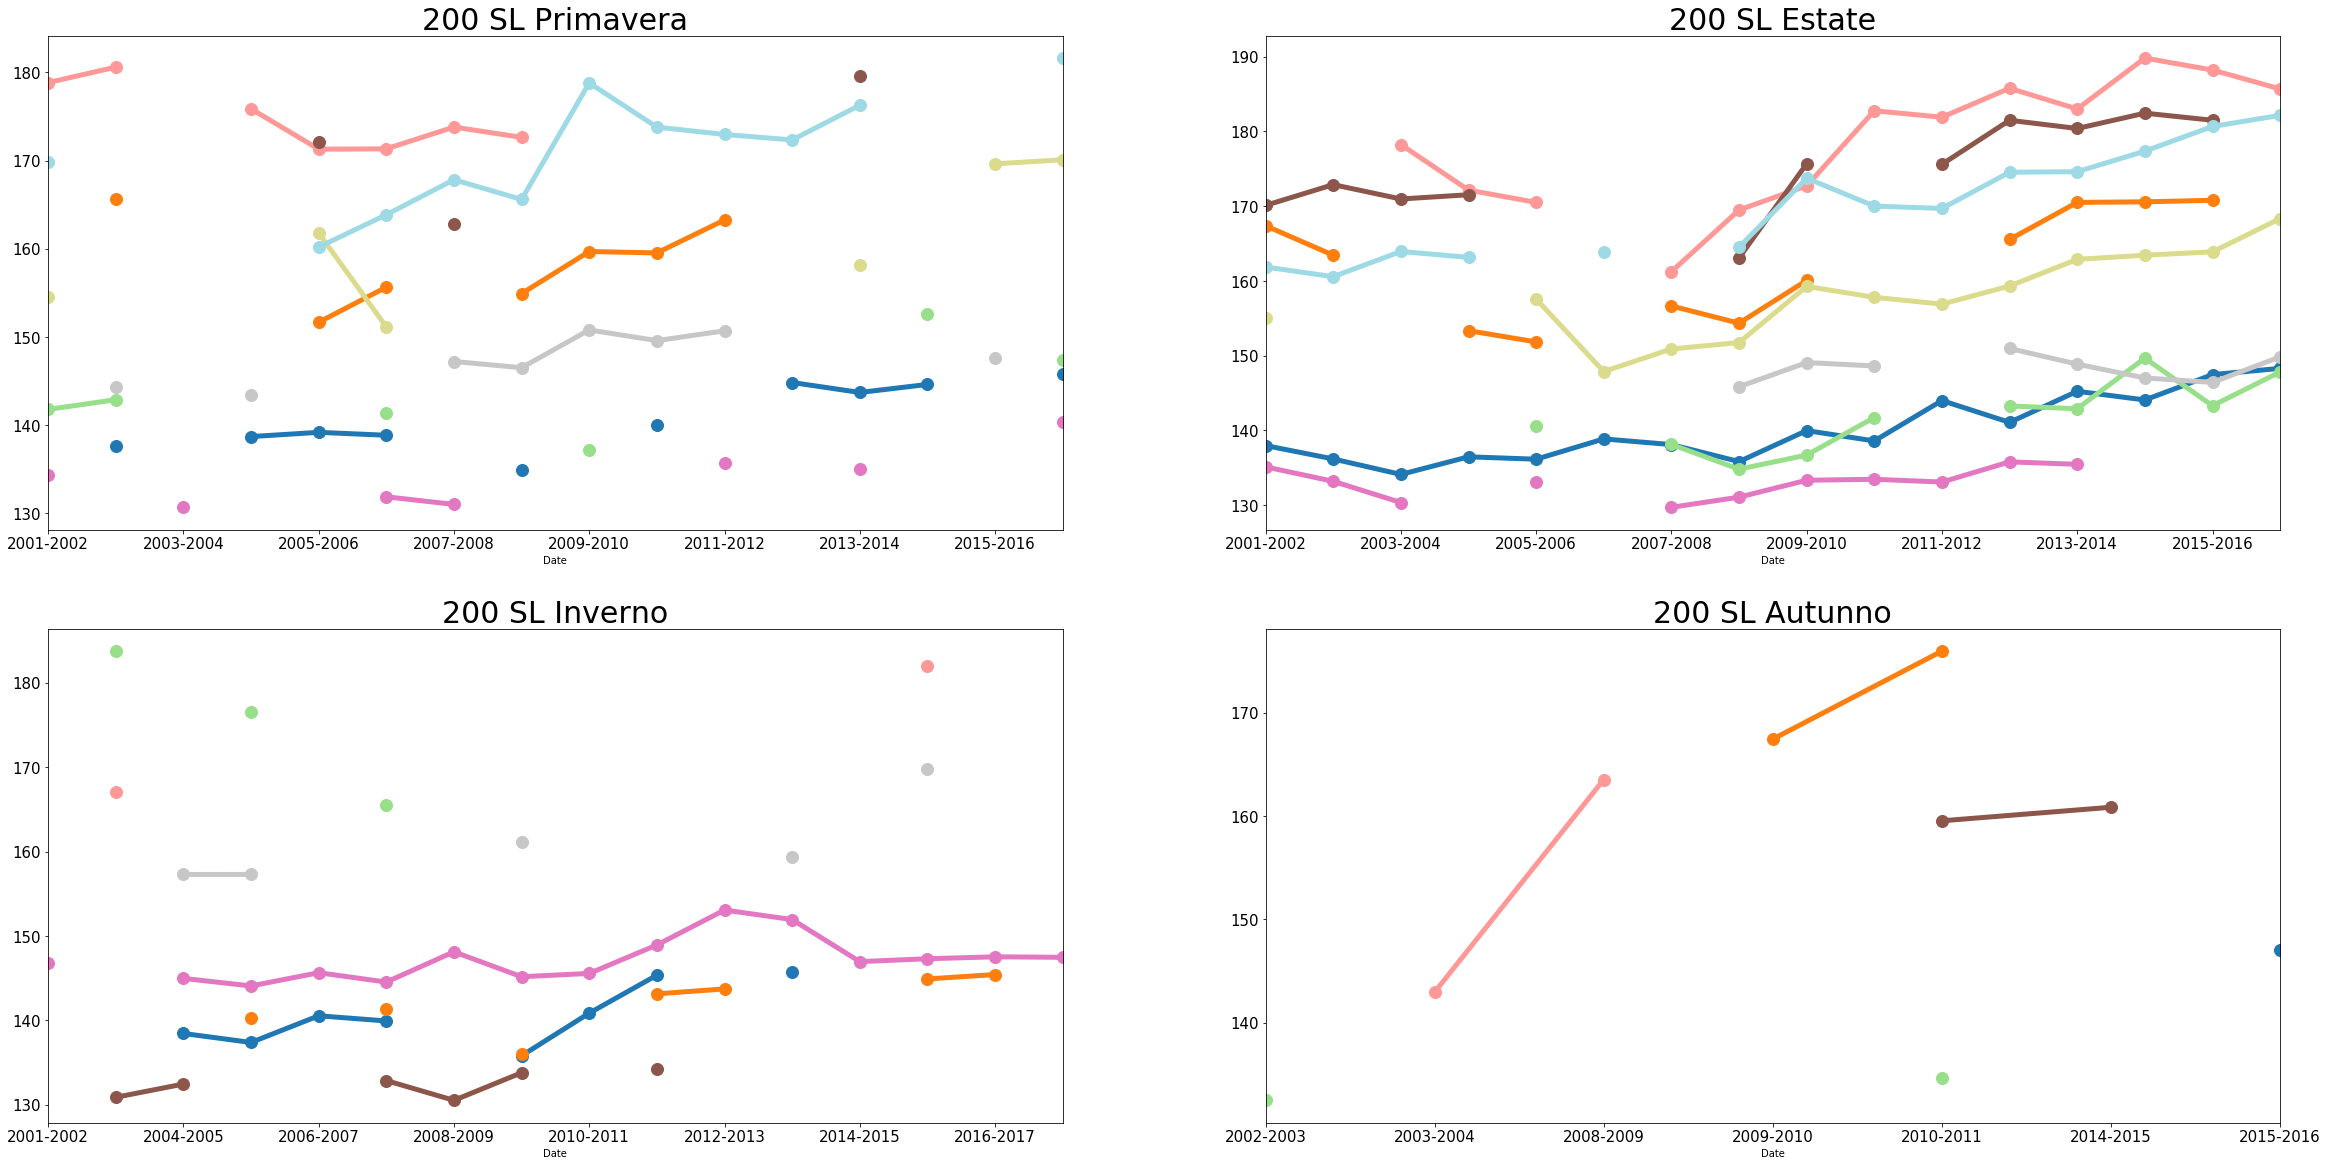

In [36]:
# Plottiamo i dati dei nuotatori in base alle Stagioni dell'anno
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (40,20))

Nuotatori_primavera_pivot.plot(ax=axes[0,0],marker= 'o',markersize=12,linestyle='-',linewidth=5, fontsize=15, color=colors, legend=False)
axes[0,0].set_title(S[Stile]+" Primavera",fontsize=30)

Nuotatori_estate_pivot.plot(ax=axes[0,1],marker= 'o', markersize=12,linestyle='-',linewidth=5, fontsize=15, color=colors, legend=False)
axes[0,1].set_title(S[Stile]+" Estate",fontsize=30)

Nuotatori_inverno_pivot.plot(ax=axes[1,0],marker= 'o',markersize=12,linestyle='-',linewidth=5, fontsize=15, color=colors, legend=False)
axes[1,0].set_title(S[Stile]+" Inverno",fontsize=30)

Nuotatori_autunno_pivot.plot(ax=axes[1,1],marker= 'o',markersize=12,linestyle='-',linewidth=5, fontsize=15, color=colors, legend=False)
axes[1,1].set_title(S[Stile]+" Autunno",fontsize=30)